# Chapter 11: Neural nets (code to produce additional figures)

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

## Import required packages

In [1]:
from pathlib import Path

import pydotplus
from IPython.display import Image
import numbers

import dmba

%matplotlib inline


no display found. Using non-interactive Agg backend


In [2]:
def layoutGraph(dot_data, pdfFile=None):
    graph = pydotplus.graph_from_dot_data(dot_data)
    return Image(graph.create_png())

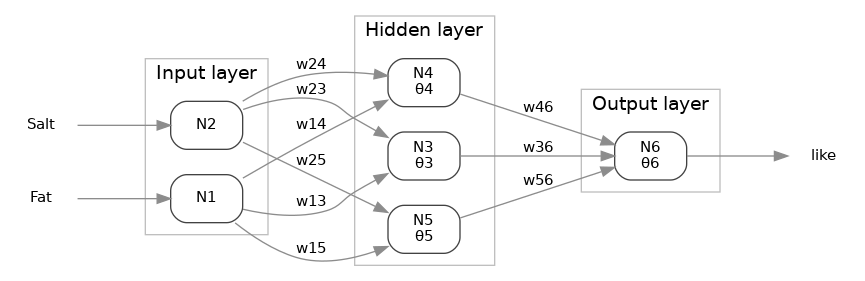

In [4]:
def unbiasedNode(id, label=None, output=None, style=None):
    label = label or f'N{id}'
    common = style or 'shape=record, style=rounded, color=gray26'
    if output is None:
        return f'{id} [ label="{label}", fontsize=11, {common} ];'
    return f'{id} [ label="{{ {label} | {output:.2f} }}", fontsize=11, {common} ];'

def biasedNode(id, bias, label=None, output=None):
    label = label or f'N{id}'
    if isinstance(bias, numbers.Number):
        bias = f'{bias:.3f}'
    if isinstance(output, numbers.Number):
        output = f'{output:.3f}'
    common = 'shape=record, style=rounded, fontsize=11, color=gray26'
    if output is None:
        return f'{id} [ label="{label}&#92;n{bias}", {common} ];'
    return f'{id} [ label="{{ {label}&#92;n{bias} | {output} }}", {common} ];'

def edge(n1, n2, weight=None):
    if weight is None:
        return f'{n1} -> {n2} [ label="w{n1}{n2}" ];'
    return f'{n1} -> {n2} [ label="{weight:.3f}" ];'

commonSettings = """
edge [ fontsize=11, color=gray55 ];
rankdir=LR;
# size="10,10"
graph [ranksep="0.8"];
"""
# node [shape=record, style=rounded, fontsize=11, color=gray26]; 

s = f"""
digraph ethane {{
{ commonSettings }
{ unbiasedNode('Salt', label='Salt', style='color=white') }
{ unbiasedNode('Fat', label='Fat', style='color=white') }
subgraph cluster_input {{ label="Input layer"; color="grey75"; 
    { unbiasedNode(2) }
    { unbiasedNode(1) }
}}
subgraph cluster_hidden {{ label="Hidden layer"; color="grey75"; 
    { biasedNode(4, '&theta;4')}
    { biasedNode(3, '&theta;3')}
    { biasedNode(5, '&theta;5')}
}}
subgraph cluster_output {{ label="Output layer"; color="grey75"; 
    { biasedNode(6, '&theta;6')}
}}
{ unbiasedNode('like', label='like', style='color=white') }
Salt -> 2;
Fat -> 1;
{ edge(1, 3) }
{ edge(2, 3) }
{ edge(1, 4) }
{ edge(2, 4) }
{ edge(1, 5) }
{ edge(2, 5) }
{ edge(3, 6) }
{ edge(4, 6) }
{ edge(5, 6) }
6 -> like
 }}
 """
layoutGraph(s, pdfFile='network-layout.pdf')

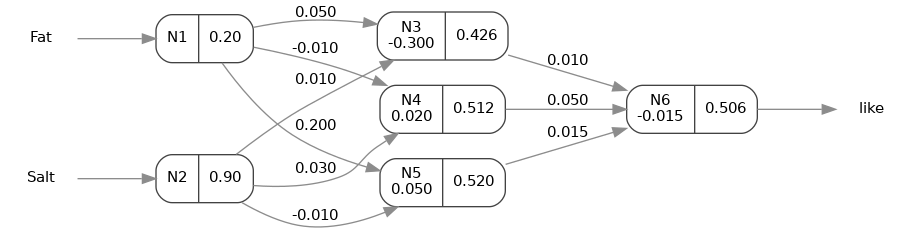

In [5]:
# Random network
s = f"""
digraph ethane {{
{ commonSettings }
{ unbiasedNode('Salt', label='Salt', style='color=white') }
{ unbiasedNode('Fat', label='Fat', style='color=white') }
{ unbiasedNode(2, output=0.9) }
{ unbiasedNode(1, output=0.2) }
{ biasedNode(4, 0.02, output=0.51224755)}
{ biasedNode(3, -0.3, output=0.42580196)}
{ biasedNode(5, 0.05, output=0.520238936)}
{ biasedNode(6, -0.015, output=0.505668252)}
{ unbiasedNode('like', label='like', style='color=white') }
Salt -> 2;
Fat -> 1;
{ edge(1, 3, 0.05) }
{ edge(2, 3, 0.01) }
{ edge(1, 4, -0.01) }
{ edge(2, 4, 0.03) }
{ edge(1, 5, 0.2) }
{ edge(2, 5, -0.01) }
{ edge(3, 6, 0.01) }
{ edge(4, 6, 0.05) }
{ edge(5, 6, 0.015) }
6 -> like
 }}
 """
layoutGraph(s, pdfFile='network-random.pdf')

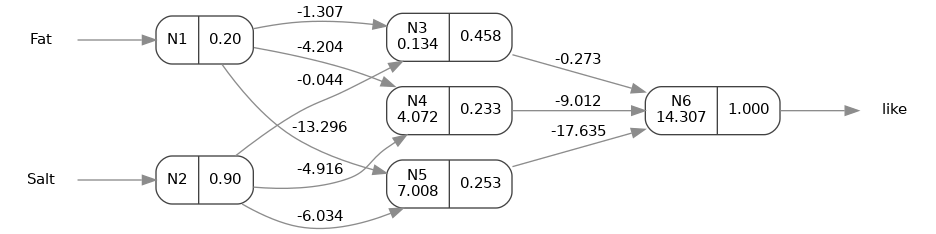

In [6]:
# Optimized network
s = f"""
digraph ethane {{
{ commonSettings }
{ unbiasedNode('Salt', label='Salt', style='color=white') }
{ unbiasedNode('Fat', label='Fat', style='color=white') }
{ unbiasedNode(2, output=0.9) }
{ unbiasedNode(1, output=0.2) }
{ biasedNode(4, 4.07247552, output=0.232750971)}
{ biasedNode(3, 0.13368045, output=0.458287289)}
{ biasedNode(5, 7.00768104, output=0.253183219)}
{ biasedNode(6, 14.30748676, output=0.99950954)}
{ unbiasedNode('like', label='like', style='color=white') }
Salt -> 2;
Fat -> 1;
{ edge(1, 3, -1.30656481) }
{ edge(2, 3, -0.04399727) }
{ edge(1, 4, -4.20427792) }
{ edge(2, 4, -4.91606924) }
{ edge(1, 5, -13.29587332) }
{ edge(2, 5, -6.03356987) }
{ edge(3, 6, -0.27348313) }
{ edge(4, 6, -9.01211573) }
{ edge(5, 6, -17.63504694) }
6 -> like
}}
 """
layoutGraph(s) 

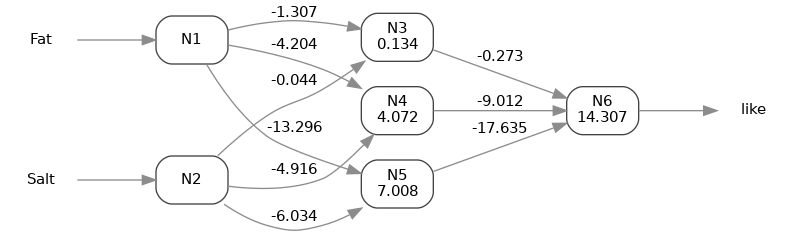

In [7]:
# Optimized network
s = f"""
digraph ethane {{
{ commonSettings }
{ unbiasedNode('Salt', label='Salt', style='color=white') }
{ unbiasedNode('Fat', label='Fat', style='color=white') }
{ unbiasedNode(2) }
{ unbiasedNode(1) }
{ biasedNode(4, 4.07247552)}
{ biasedNode(3, 0.13368045)}
{ biasedNode(5, 7.00768104)}
{ biasedNode(6, 14.30748676)}
{ unbiasedNode('like', label='like', style='color=white') }
Salt -> 2;
Fat -> 1;
{ edge(1, 3, -1.30656481) }
{ edge(2, 3, -0.04399727) }
{ edge(1, 4, -4.20427792) }
{ edge(2, 4, -4.91606924) }
{ edge(1, 5, -13.29587332) }
{ edge(2, 5, -6.03356987) }
{ edge(3, 6, -0.27348313) }
{ edge(4, 6, -9.01211573) }
{ edge(5, 6, -17.63504694) }
6 -> like
}}
 """
layoutGraph(s, pdfFile='network-optimized.pdf') 

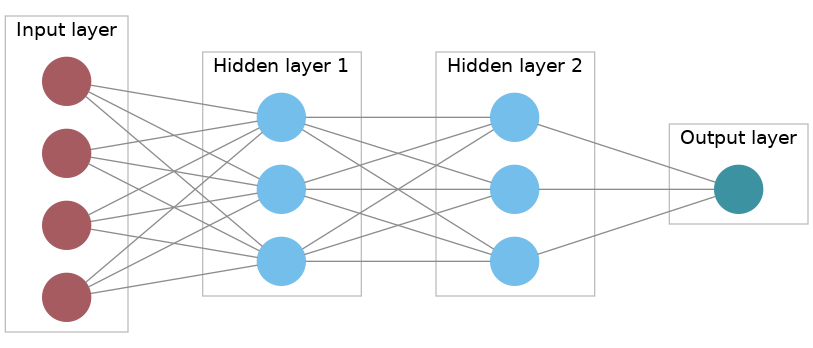

In [8]:
def node(color):
    return f'[label="", shape="circle", color="{color}", fillcolor="{color}", style="filled"]'

input = '\n'.join(f'i{i} {node("#A55B60")}; ' for i in range(4))
hidden1 = '\n'.join(f'h1{i} {node("#74BEEB")}; ' for i in range(3))
hidden2 = '\n'.join(f'h2{i} {node("#74BEEB")}; ' for i in range(3))
output = '\n'.join(f'o{i} {node("#3D92A2")}; ' for i in range(1))

def connections(layer1, count1, layer2, count2):
    s = []
    for i in range(count1):
        for j in range(count2):
            s.append(f'{layer1}{i} -- {layer2}{j} [color="gray55"];')
    return '\n'.join(s)

s = f"""
graph {{
    size="10,10"
    graph [ranksep="1"];
    rankdir=LR;
    splines=line;
    subgraph cluster_input {{ label="Input layer"; color="grey75"; { input } }}
    subgraph cluster_hidden1 {{ label="Hidden layer 1"; color="grey75"; { hidden1 } }}
    subgraph cluster_hidden2 {{ label="Hidden layer 2"; color="grey75"; { hidden2 } }}
    subgraph cluster_output {{ label="Output layer"; color="grey75"; { output } }}
    { connections('i', 4, 'h1', 3)}
    { connections('h1', 3, 'h2', 3)}
    { connections('h2', 3, 'o', 1)}
}}
"""
layoutGraph(s, pdfFile='network-4331.pdf') 